For reviews on Normalizing Flows and important notes I have follwed mostly these 2 papers--

1. _[Normalizing Flows for Probabilistic Modeling and Inference](https://arxiv.org/pdf/1912.02762.pdf)_

2. _[Normalizing Flows: An Introduction and Review
of Current Methods](https://arxiv.org/pdf/1908.09257.pdf)_

3. The original paper where Normalizing Flows were introduced: _[Variational Inference with Normalizing Flows](https://arxiv.org/pdf/1505.05770.pdf)_



A Normalizing Flow is a transformation of a simple probability distribution (e.g., a standard normal) into a more complex distribution by a sequence of invertible and differentiable mappings. 

Rather than directly introducing Normalizing Flow, we first get into some necessary mathematics (important in context of _invertible and differentiable mappings_) and we will start with Bijection, Inverse Transform and Chain Rule.  



## 1. Bijection

A function $f:A→B$ is bijective (or $f$ is a bijection), if each $b∈B$ has exactly one preimage. Loosely speaking, all elements of the sets can be matched up in pairs so that each element of one set has its unique counterpart in the second set.

Bijective means both _Injective_ and _Surjective_ together. 
Consider 2 Sets A, B; Injective means we won't have two or more "A"s pointing to the same "B". Surjective means that every "B" has at least one matching "A". **In Bijection, there's a perfect "one-to-one correspondence" between the members of the sets**.


The most important property of a bijective function is the existence of an <font color='lime'>_inverse function_ </font> which undoes the operation of the function. These functions can then be viewed as dictionaries by which one can translate information from the domain to the codomain and back again.

Example: The function from set $\{1, 2, 3, 4\}$ to set $\{8, 9, 10, 11\}$ defined by the formula $f(x) = x + 7$ is a bijection. 

Here it is better to introduce another mathematical definition: *Diffeomorphism*. It is a special kind of bijection where both the original manifold and the manifold resulting from the mapping are differentiable.

------------------------------------------------

## 2. Diffeomorphism 


Consider $x$ as a $D$ dimensional vector and we would like to define a joint distribution over $x$. The main idea of flow-based modeling is to express $x$ as a transformation $\phi$ of a real vector $u$ sampled from $p_u(u)$: 

$$x = \phi(u)\, \, \text{where},\, \,  u \sim p_u(u)\, ...... (eq: 2.1)$$. 

Here $p_u(u)$ is called the base distribution of the flow model[Cite 1]. 

The defining property of flow-based models is that the transformation $\phi$ must be invertible and both $\phi,\, \phi ^{−1}$ must be differentiable. These transformations are called _Diffeomorphisms_ and demand that $u$ must be $D$ dimensional as well. 

----------------------------------------------------

## 3. Change of Variable & Jacobian 

We take a detour now to undergrad linear algebra & calculus class. Change of variables is specially useful for solving integrals i.e. changing from cartesian coordinates to polar coordinates. 

If the original variables are $(x, y)$, and the new variables are $(u, v)$, then there’s a function $T : \mathbb{R}^2 → \mathbb{R}^2$ that gives $u$ and $v$ in terms of $x$ and $y$, that is, $T(u, v) = x(u, v), \, y(u, v)$. 

Let's start with an integral $\int f(x) \, dx$, if we make a substitution $x = x(u)$, we can write 

$$ \int f(x)\, dx = \int f\left(x(u)\right) \frac{dx}{du}\, du$$


In a more proper notation we can summarize as follows (the change of variable rule)

Let $T$ be a $C^1$ diffeomorphism (If T is $r$ times continuously differentiable, $T$ is called a $C^r$ diffeomorphism) from $D_1$ to $D$. For any continuous function $f$ in $D$

$$\int _D f(x)\, dx = \int _{D_1} f(T(y))\, |J_{T}(y)|\, dy  $$

We can extend it to 3 dimension

$$\int\int\int_{\Omega} f(x, y, z)\, dV(x, y, z) = \int\int\int_{\Omega _1} f\left(T (u, v, w)\right)\, |J_{T}(u, v, w)|\, dV(u, v, w)$$

------------------------------------------------

### 3.1. Linear Algebra 

Consider a linear transformation $T : \mathbb{R}^2 → \mathbb{R}^2$ (In mathematics, the real coordinate space of dimension $n$, denoted $\mathbb{R}^n$ ). Such a linear transformation can be described by a $2 × 2$ matrix $A$. Taking ordered pairs as column vectors, we can write 

$$\begin{bmatrix} x\\y \end{bmatrix} = T(u, \,v) = A \left[\begin{matrix} u\\v \end{matrix}\right]; \, \, \text{where}\, \, T = \left[\begin{matrix} au + bv \\cu + dv \end{matrix}\right]; \, \,  A = \left[\begin{matrix} a & b \\c & d \end{matrix}\right]; \, \, ;$$

Importantly $A$ can be written as 

$$\begin{bmatrix} \frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} \\ \frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} \end{bmatrix}$$ 

The matrix $A$ sends the unit square (the square with two sides being the standard unit vectors $i$ and $j$) to a parallelogram with two sides being the
columns of A, namely,
$\begin{bmatrix} a \\ c\end{bmatrix} , \, \begin{bmatrix} b \\ d\end{bmatrix}$. The matrix $A$ of partial derivatives (which is a constant matrix when T is a linear transformation) has a determinant which is called the **Jacobian** of
$T$.  The area of this parallelogram is $| det(A)|$, the absolute value of the determinant of $A$. 

We show here example of linear transformation but the concept of change of variable and Jacobian matrix remains same even for non-linear transformation. For linear transformations, this stretching or shrinking is particularly easy to visualize as it always stretches or shrinks by the same amount (here we saw it as a square changing to parallelogram). For nonlinear transformations like polar coordinates, we will see that the stretching or shrinking can change depending on location. A method for capturing how the stretching or shrinking changes is a central component of changing variables in double integrals. 

Generally if $D$ is any region in $\mathbb{R^2}$ and $D_1 = T(D)$ is its image under this linear transformation, then 

$$\text{Area}\,(D_1) = | \det(A)|\,  \text{Area}\, (D)$$

We can easily verify this by taking an example of changing from cartesian coordinates to polar coordinates in $\mathbb{R^2}$ space. We know the transformation rule is $x = r \text{cos}\, \theta, \, y = r \text{sin}\, \theta,$ 
So the Jacobian matrix for transformation is 

$$J = \frac{\partial\, (x, y)}{\partial\, (r, \theta)} = \begin{bmatrix} \frac{\partial\, x}{\partial r} & \frac{\partial\, x}{\partial\, \theta}\\ \frac{\partial\, y}{\partial r} & \frac{\partial\, y}{\partial\, \theta}\end{bmatrix}$$

$$dA(x, \, y) = \left|\det \,  J \right|  \, dA(r, \, \theta) = r\, dr \, d\theta$$

----------------------------------------------

### 3.2. Probability and Change of Variables

Consider a simple transformation, a random variable $U$ that is uniformly distributed over the unit cube, $u∈[0,1]^3$. We can scale $U$ by a factor of $n$ to get a new random variable $X$, i.e. (fig. 1)

$$x = \phi(u) = \begin{vmatrix} n & 0 & 0 \\ 0 & n & 0 \\ 0 & 0 & n\end{vmatrix}\, u\, ......\, (eq: 3.2.1)$$

But what about the probability densities $p_X(x), \, p_U(u)$? We know that every distribution sums to 1. We started from a volume of unit cube, 

$$p_X = p_U \frac{V_U}{V_X} = p_U \, \frac{1}{n^3}\, ......\, (eq: 3.2.2)$$

From the definition of probability distribution: 

$$ \int p_X(x)\, dx = \int p_U (u)\, du = 1\, ......\, \text{}(eq: 3.2.3)$$

For the sake of simplicity, if we consider a single region

$$\begin{align} p_X(x)\, dx &= p_U (u)\, du\, ;\,  \\ \text{log}\, p_X(x) &= \text{log}\, p_U(u) + \text{log}\, \frac{du}{dx}\, ......\, (eq: 3.2.4)\end{align}$$

The previous discussion (fig. 1) related to the transformation from $u \rightarrow x$, tells us that how much $du$ has been shrunk/stretched to $dx$ due to the transformation from $p(u) \rightarrow p(x)$ due to the mapping function (invertible) $\phi$ (fig. 2).

![Vol_conv](https://drive.google.com/uc?id=1sT1oZt0OxlKYYWfCXnijaZi5yLo3dQM7)


 

We remember our transformation from $u$ to $x$ via mapping function $\phi$ as $x = \phi(u)\, ; \,  u = \phi ^{-1}(x)$  in eq. 2.1. 

From the previous discussion on transformation (in linear algebra section) we know that stretching/shrinking due to linear/non-linear transformation can be quantified by the determinant of the Jacobian matrix. Very similarly, here also the multivariate transformation rule becomes (from eq. 3.2.4)-- 

$$\begin{align} p_X(x) = p_U\left(u\right) \, \left|\det \, \frac{du}{dx} \right| &=  p_U\left(u\right) \, \left|\det \, \frac{dx}{du} \right|^{-1}\\ &= p_U (u) \, \left|\det \, J_{\phi}(u) \right|^{-1}\end{align}\, ......\, (eq: 3.2.5)$$

Where $$ J_{\phi}(u) = \begin{vmatrix} \frac{\partial \phi _1}{\partial u_1}\cdots & \cdots & \frac{\partial \phi _1}{\partial u_D} \\ \cdots & \cdots &\cdots \\ \frac{\partial \phi _D}{\partial u_1}\cdots & \cdots & \frac{\partial \phi _D}{\partial u_D} \end{vmatrix}$$

R.H.S. of  equation 3.2.5 is completely dependent on the base variable $u$. Taking the logarithm on both sides, we can also write--

$$ \log \, p_X(x) = \log \, p_U(u) - \log \, |\det \, J_{\phi}(u)|......\, (eq: 3.2.6)$$

Since $\phi$ is invertible, we can write it in another form, starting from $p_U(u)$ and use $u = \phi ^{-1}(x)$ & Jacobian of $\phi ^{-1}$,  as follows ---. 





$$\begin{align} p_U(u) = p_X\left(x\right) \, \left|\det \, \frac{dx}{du} \right| &= p_X\left(x\right) \, \left|\det \, \frac{du}{dx} \right|^{-1}\\ &= p_X\left(x\right) \, \left|\det \, J_{\phi ^{-1}}(x) \right|^{-1} \end{align} \, ......\, (eq: 3.2.7)$$

Once again taking the logarithm on both sides we can write.. 

$$ \log \, p_U(u) = \log \, p_X(x) - \log \, |\det \, J_{\phi ^{-1}}(x)|......\, (eq: 3.2.8)$$

These equations are quite the same as eq, 2, 3, 4 in _[Normalizing Flows for Probabilistic Modeling and Inference](https://arxiv.org/pdf/1912.02762.pdf)_. Check the review paper as mentioned at the start of the document. 


----------------------------------------

## 4. Normalizing Flows


Before we have limited our discussion to only one transformation via an invertible function $\phi$. A very important property of the diffeomorphism (transformation via a function such that the function and its inverse both are differentiable) is that they are _composable_ i.e. given two such transformations $\phi _1, \, \phi_2$ their composition $\phi _1 \, \cdot \, \phi_2$ is also invertible and differentiable (We will use some examples of such compositions soon). The inverse and Jacobian determinant are given by

$$\begin{align}(\phi _2 \, \cdot \, \phi_1 )^{-1} &= \phi_1 ^{-1} \cdot \phi_2 ^{-1} \\ \det J_{\phi _2 \, \cdot \, \phi_1} (u) &= \det J_{\phi _2}\left(\phi_1(u)\right)\, \cdot \, \det J_{\phi _1}(u)\end{align}......\, (eq: 4.1)$$

The idea behind Normalizing flow is to chain together multiple diffeomorphisms $\phi _1, \, \phi_2, \, \cdots \, \phi_k$ to gradually obtain $x$ (original data) coming from a complex distribution $p_X(x)$, starting from $u$, coming from a simple base distribution $p_U(u)$. 

Hence, the term `flow’ refers to the trajectory that a collection of samples from $p_U(u)$ follow as they are gradually transformed by the sequence of transformations $\phi_1, . . . , \phi _K$ .

The term `normalizing’ refers to the fact that the inverse flow through $\phi^{−1}_K ,\,  \cdots , \phi^{−1}_1$ takes a collection of samples from $p_X(x)$ and transforms them (in a sense, ‘normalizes’ them) into a collection of samples from a prescribed density $p_U(u)$ (which is often taken to be a
multivariate normal). 

![NormFlow](https://drive.google.com/uc?id=1RPHSiDD9DBeWr6qrTv4-x5Nz9t9qrTKC)


In [ ]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150


import tensorflow as tf
import tensorflow_probability as tfp


tfd = tfp.distributions
tfb = tfp.bijectors

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)


TF version: 2.8.2
TFP version: 0.16.0


Check the [TensorFlow Bijector module](https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/Bijector), here I will start with some simple bijection operations and combinations of them. We already know that composition of 2 (or more) diffeomorphisms is a diffeomorphism too (i.e. invertible and differentiable).  

In [ ]:
### simple bijection operation 

z = tf.constant([1., 2., 3.])
scale_b = tfb.Scale(2.) # define a scale bijector
x = scale_b.forward(z) # new variable after forward transformation

print ('check 1D tensor before  after scaling: ', z, '\n', x)

#### chain two bijection operations

shift_b = tfb.Shift(3.)
scale_shift_b = tfb.Chain([scale_b, shift_b]) # operates from right to left, 1st is shift
x_chain = scale_shift_b.forward(z) # new variable after 

print ('check 1D tensor before  after shift (3) + scale (2): ', z, '\n', x_chain)

check 1D tensor before  after scaling:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32) 
 tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)
check 1D tensor before  after shift (3) + scale (2):  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32) 
 tf.Tensor([ 8. 10. 12.], shape=(3,), dtype=float32)


Important point of bijection operation is that the inverse of the transform also exists and it is very easy to perform in TensorFlow via `inverse` method in bijector module.   

In [ ]:
x_chain_inverse = scale_shift_b.inverse(x_chain)

print ('original tensor: ', z)
print ('scale and shift forward transform: ', x_chain)
print ('inverse of the forwards transform: ', x_chain_inverse)

original tensor:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
scale and shift forward transform:  tf.Tensor([ 8. 10. 12.], shape=(3,), dtype=float32)
inverse of the forwards transform:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


Not only constant tensors, we can use sample from random distributions too! 

In [ ]:
normal_dist = tfd.Normal(loc=0., scale=2.0)

z = normal_dist.sample(5)
print ('check initial z: ', z)

### understanding what log prob is
# prob_z = normal_dist.prob(z)
# print ('check prob_z: ', prob_z)
# logprob_z = np.log(prob_z.numpy())
# print ('check understanding of log prob: ', logprob_z)
###


log_prob_z = normal_dist.log_prob(z) 
print('check log probability of z; ', log_prob_z)

x_chain = scale_shift_b.forward(z)
print ('check z after shift (3) + scale (2): ', x_chain)

check initial z:  tf.Tensor([ 0.8660087 -1.1203468  1.8080809 -1.2279651 -1.9144316], shape=(5,), dtype=float32)
check log probability of z;  tf.Tensor([-1.7058321 -1.7689828 -2.0207303 -1.800573  -2.0702167], shape=(5,), dtype=float32)
check z after shift (3) + scale (2):  tf.Tensor([7.7320175 3.7593064 9.616161  3.5440698 2.1711369], shape=(5,), dtype=float32)


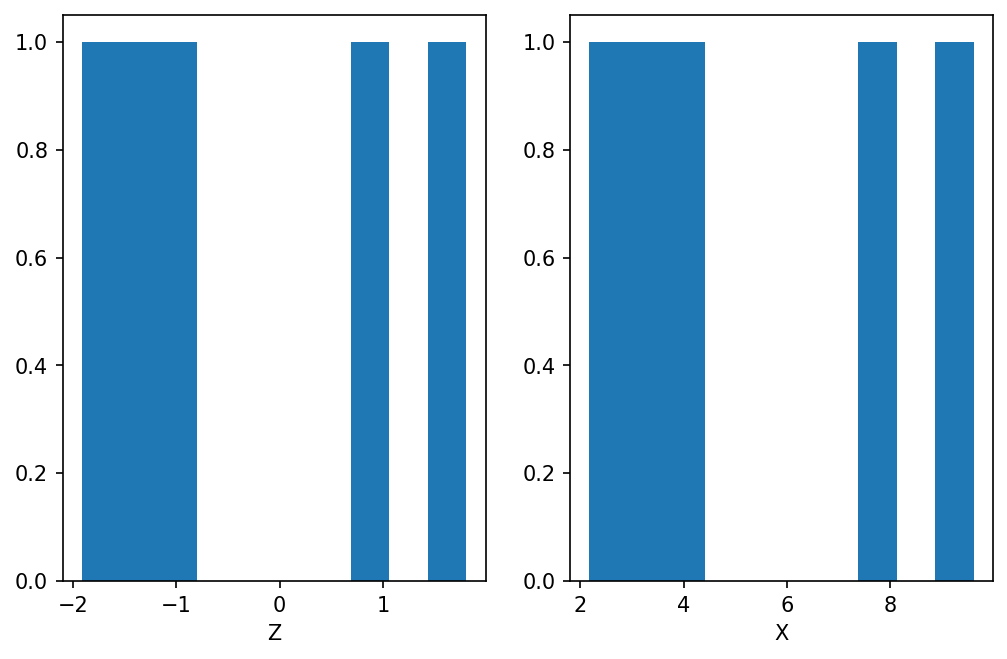

In [ ]:
fig = plt.figure(figsize=(8, 5))
fig.add_subplot(121)
plt.hist(z)
plt.xlabel('Z')
fig.add_subplot(122)
plt.hist(x_chain)
plt.xlabel('X')
plt.show()

We already know the change of variables formula and here we can verify it. 

1. We start with a variable (say z)
2. perform bijection (in this case series of bijections chained together). 
3. Reach a new state, say x (defined before as `x_chain` in the code). 
4. check the log prob of z. 
5. From log prob of z calculate log prob x via the rule that we derived before. For forward method we use rule 3.2.6.
6. verify it separately by calculating log prob x by using the inverse transformation rule as in 3.2.8. 

In [ ]:
log_prob_x_chain = log_prob_z - scale_shift_b.forward_log_det_jacobian(z)
print ('log prob of new variable from change of variable rule (forward): ', log_prob_x_chain)
log_prob_x_inv = log_prob_z + scale_shift_b.inverse_log_det_jacobian(x_chain)
print ('log prob of new variable from change of variable rule (inverse): ', log_prob_x_inv)

log prob of new variable from change of variable rule (forward):  tf.Tensor([-2.3989792 -2.46213   -2.7138774 -2.49372   -2.7633638], shape=(5,), dtype=float32)
log prob of new variable from change of variable rule (inverse):  tf.Tensor([-2.3989792 -2.46213   -2.7138774 -2.49372   -2.7633638], shape=(5,), dtype=float32)


#### Try Some Other Distribution 

Here we will also see the effect of broadcasting which is similar to numpy broadcasting. 


**Gompertz Distribution:**

$f(x; \eta, b) = 1 - e^{-\eta\, {\left(e^{bx} -1\right)}}$

In TensorFlow bijector we have this distribution as 

`GompertzCDF(concentration, rate)`; concentration = $\eta$, rate = $b$. 

In [ ]:
z = np.linspace(0.1, 5, 500)[..., np.newaxis]
z = z.astype('float32')

print ('check z shape: ', z.shape)
print ('check first few values: ', z[0:5])

gompertz = tfb.GompertzCDF(concentration=[0.1, 1.0, 2.0], rate=[0.9, 1.5, 0.4]) # 3 sets of parameters

x = gompertz.forward(z)

print ('check shapes after transformation: ', x.shape, )
print ('check first few values after transformation: ', x[0:5])

check z shape:  (500, 1)
check first few values:  [[0.1       ]
 [0.10981964]
 [0.11963928]
 [0.12945892]
 [0.13927856]]
check shapes after transformation:  (500, 3)
check first few values after transformation:  tf.Tensor(
[[0.00937322 0.14941783 0.07837933]
 [0.01033493 0.16395603 0.08589875]
 [0.01130423 0.17845596 0.09338606]
 [0.01228118 0.192914   0.10084116]
 [0.01326581 0.20732638 0.10826391]], shape=(5, 3), dtype=float32)


In [ ]:
z_tile = np.tile(z, 3) # 3 sets of parameters
print ('check shapes after tile: ', z_tile.shape)
print ('check first few values: ', z_tile[0:3])

check shapes after tile:  (500, 3)
check first few values:  [[0.1        0.1        0.1       ]
 [0.10981964 0.10981964 0.10981964]
 [0.11963928 0.11963928 0.11963928]]


(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.1, 1. , 2. ], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.9, 1.5, 0.4], dtype=float32)>) 
 ['Concentration', 'Rate']
check params:  0.1


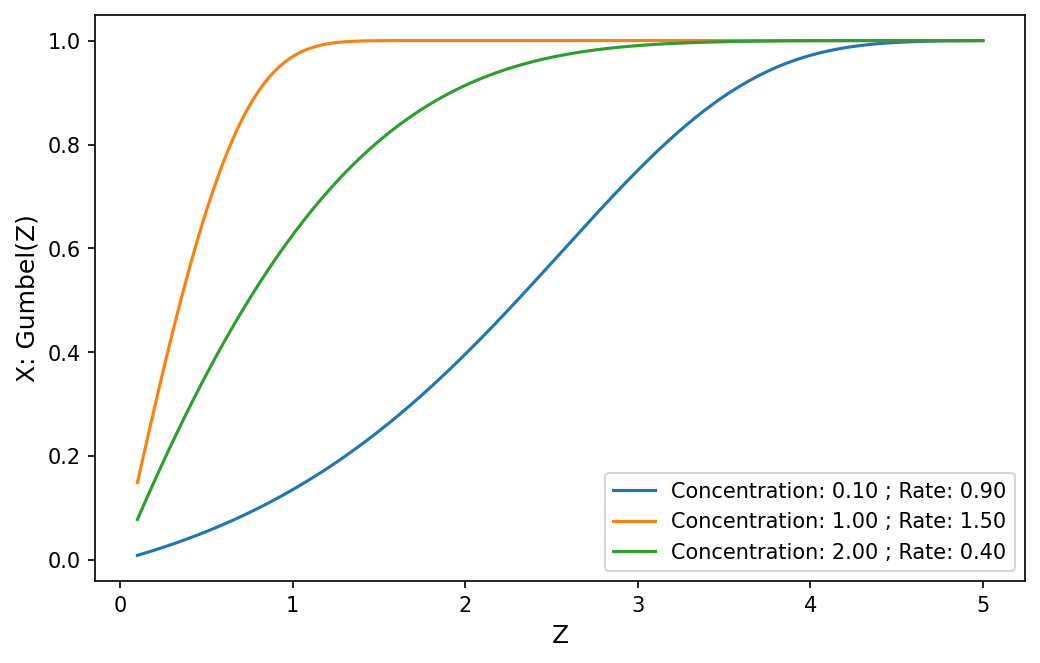

In [ ]:
param_bijector = tuple(getattr(gompertz, name) for name in ['concentration', 'rate'])
param_names = ['concentration', 'rate']
param_names_cap = [param_names[0].capitalize(), param_names[1].capitalize()]
print (param_bijector, '\n', param_names_cap)



print ('check params: ',  param_bijector[0][0].numpy())
fig = plt.figure(figsize=(8, 5))
plt.plot(z_tile[:, 0], x[:, 0], 
         label=param_names_cap[0] + ': {:.2f}'.format(param_bijector[0][0].numpy()) 
         +' ; '+ param_names_cap[1] + ': {:.2f}'.format(param_bijector[1][0].numpy())) 

plt.plot(z_tile[:, 1], x[:, 1], 
         label=param_names_cap[0] + ': {:.2f}'.format(param_bijector[0][1].numpy()) 
         +' ; '+ param_names_cap[1] + ': {:.2f}'.format(param_bijector[1][1].numpy()))

plt.plot(z_tile[:, 2], x[:, 2], 
         label=param_names_cap[0] + ': {:.2f}'.format(param_bijector[0][2].numpy()) 
         +' ; '+ param_names_cap[1] + ': {:.2f}'.format(param_bijector[1][2].numpy()))


plt.legend()
plt.xlabel('Z', fontsize=12); plt.ylabel('X: Gumbel(Z)', fontsize=12)
plt.show()

### Scaling Bijectors

Before when we inrtoduced normalizing flows and bijection, we discussed how we could think of transforming from one distribution to another as stretching/shrinking of the coordinate space.

Here we will use scaling bijectors to see this in action.  


We start of with a rectangular distribution i.e. uniform distribution and use scaling bijectors to see how it changes. Let's assume our starting distribution is 2D i.e. $x = [x_1, \, x_2]^T$, we scale it as below


$$\begin{align} y = \begin{bmatrix} y_1 \\ y_2  \end{bmatrix}  = \begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22}  \end{bmatrix}\, \begin{bmatrix} x_1 \\ x_2  \end{bmatrix} \end{align}$$

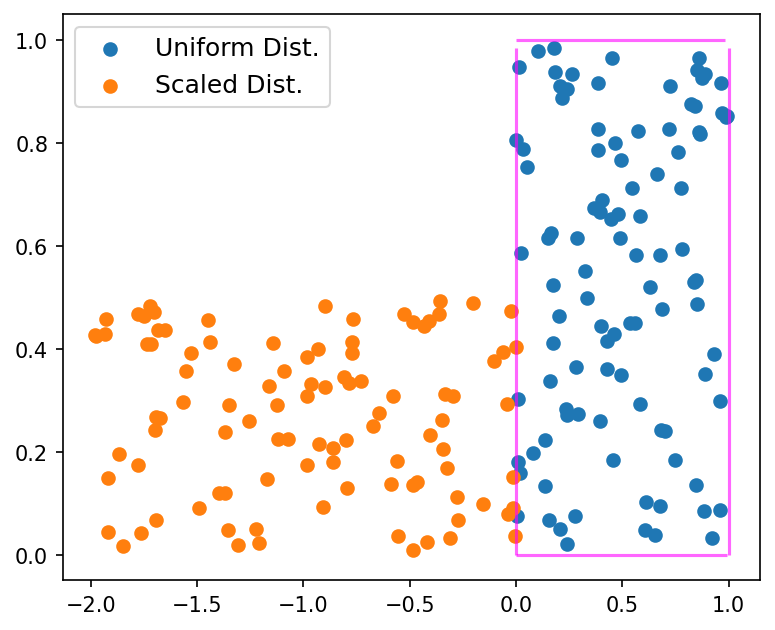

In [ ]:
### original distribution
uniform = tfd.Uniform(low=[0.0, 0.0], high=[1.0, 1.0]) # 2d
x = uniform.sample(100)
###


### scale bijection 

scale_bijector1 = tfb.ScaleMatvecDiag(scale_diag=[-2, 0.5]) # similar to tf.diag
y1 = scale_bijector1(x)

# print (len(x), x[0:5])
fig = plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], label='Uniform Dist.')
plt.scatter(y1[:, 0], y1[:, 1], label='Scaled Dist.')
plt.vlines(x=1, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.vlines(x=0, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=max(x[:, 0]), color='magenta', alpha=0.6)
plt.hlines(y=1, xmin=0, xmax=max(x[:, 1]), color='magenta', alpha=0.6)

plt.legend(fontsize=12)
plt.show()

Diagonal matrix will always perform scaling operation on the two dimensions independently, i.e. rectangular distribution remains rectangular. 

What if we want to change from rectangular to quadrilateral distribution? Here we can use the lower triangular matrix for scaling bijection operation. Let's see: 


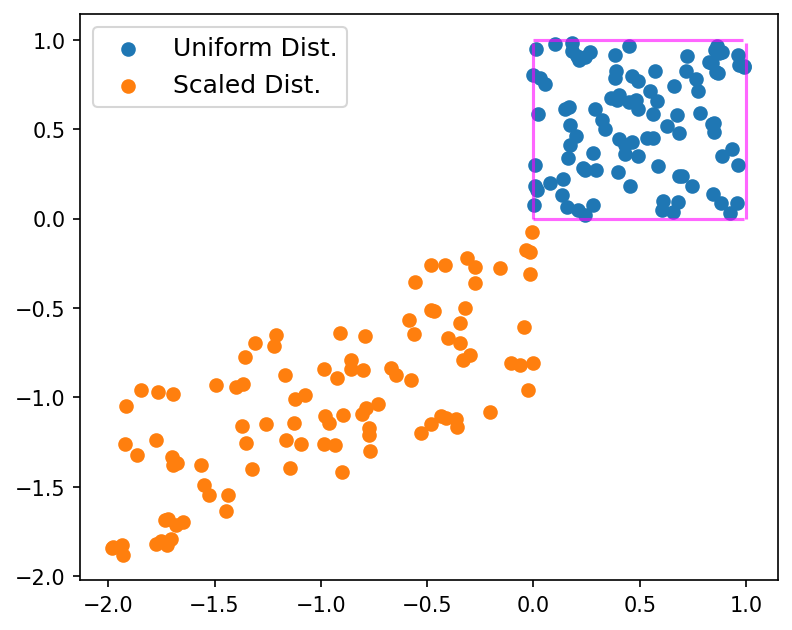

In [ ]:
scale_bijector2 = tfb.ScaleMatvecTriL(scale_tril=[[-2.0, 0.0], 
                                                  [-1.0, -1.0]])

y2 = scale_bijector2(x)

fig = plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], label='Uniform Dist.')
plt.scatter(y2[:, 0], y2[:, 1], label='Scaled Dist.')
plt.vlines(x=1, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.vlines(x=0, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=max(x[:, 0]), color='magenta', alpha=0.6)
plt.hlines(y=1, xmin=0, xmax=max(x[:, 1]), color='magenta', alpha=0.6)

plt.legend(fontsize=12)
plt.show()

As bijection operation are invertible, we can readily check this here

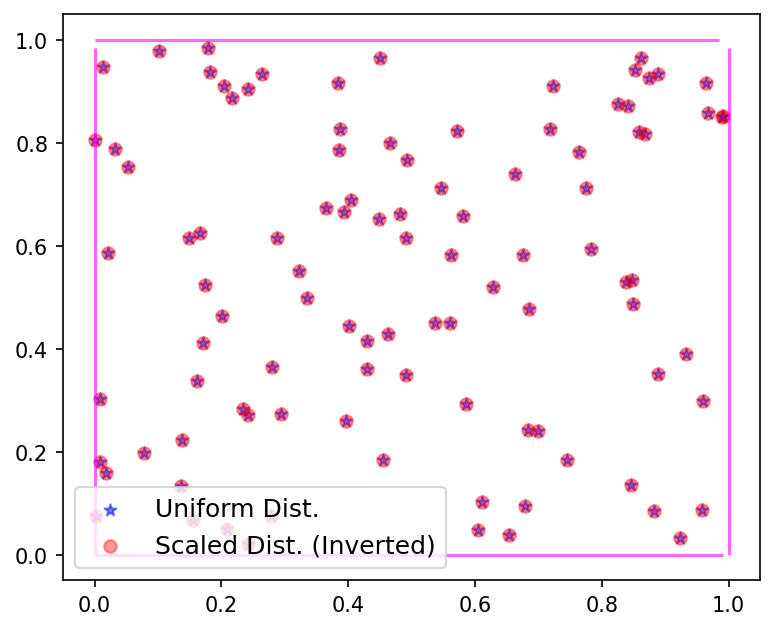

In [ ]:
y2_inv = scale_bijector2.inverse(scale_bijector2(x))


fig = plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], label='Uniform Dist.', c='b', alpha=0.5, marker='*')
plt.scatter(y2_inv[:, 0], y2_inv[:, 1], label='Scaled Dist. (Inverted)', c='r', alpha=0.4)
plt.vlines(x=1, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.vlines(x=0, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=max(x[:, 0]), color='magenta', alpha=0.6)
plt.hlines(y=1, xmin=0, xmax=max(x[:, 1]), color='magenta', alpha=0.6)

plt.legend(fontsize=12)
plt.show()

So far we have seen the simplest scaling bijector matrices, diagonal & lower-triangular matrices. We can also use general matrices which do not fall into the above categories & for that we can use [`ScaleMatvecLinearOperator`](https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/ScaleMatvecLinearOperator) bijector in combination with [`LinearOperator`](https://www.tensorflow.org/api_docs/python/tf/linalg/LinearOperatorFullMatrix) class.  

Let's see an example below: 


check scale matrix:  tf.Tensor(
[[ 2.5 -0.5]
 [ 1.5 -1.5]], shape=(2, 2), dtype=float32)


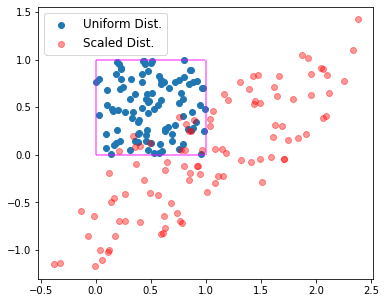

In [ ]:
full_matrix = [[2.5, -0.5], 
               [1.5, -1.5]]

scale_matrix = tf.linalg.LinearOperatorFullMatrix(matrix=full_matrix)
print ('check scale matrix: ', scale_matrix.to_dense())

scale_bijector3 = tfb.ScaleMatvecLinearOperator(scale_matrix)

y3 = scale_bijector3(x)

fig = plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], label='Uniform Dist.')
plt.scatter(y3[:, 0], y3[:, 1], label='Scaled Dist.', c='r', alpha=0.4)
plt.vlines(x=1, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.vlines(x=0, ymin=0, ymax=max(x[:, 1]), color='magenta', alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=max(x[:, 0]), color='magenta', alpha=0.6)
plt.hlines(y=1, xmin=0, xmax=max(x[:, 1]), color='magenta', alpha=0.6)

plt.legend(fontsize=12)
plt.show()